# Credit Card Fraud Detection with ML

## Loading the data

Dataset link: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pycaret.classification import *

%matplotlib inline 
#forces matplotlib to display plots directly in the output cells of a Jupyter notebook (or IPython console), without needing to explicitly call plt.show()


In [2]:
df=pd.read_csv('./data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## EDA & Preprocessing

In [3]:
df.shape

(284807, 31)

In [4]:
print(f"null rows:\n{df.isnull().sum()}")

null rows:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [5]:
print(f"\nTotal duplicate rows: {df.duplicated().sum()}")


Total duplicate rows: 1081


In [6]:
#dropping duplicate rows
df=df.drop_duplicates()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

note from the dataset maintainers:

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. 

- Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.
- Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 
- The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise. 

In [28]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

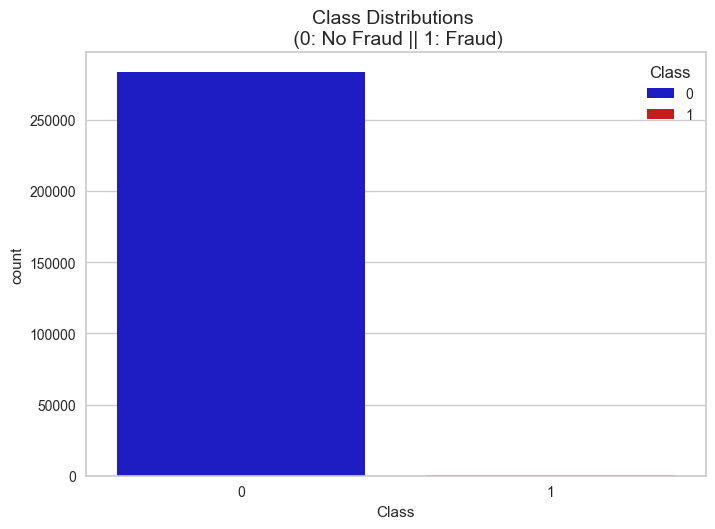

In [29]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(x='Class', data=df, palette=colors, hue='Class')
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
#extremely imbalanced dataset

<Axes: xlabel='Time', ylabel='Count'>

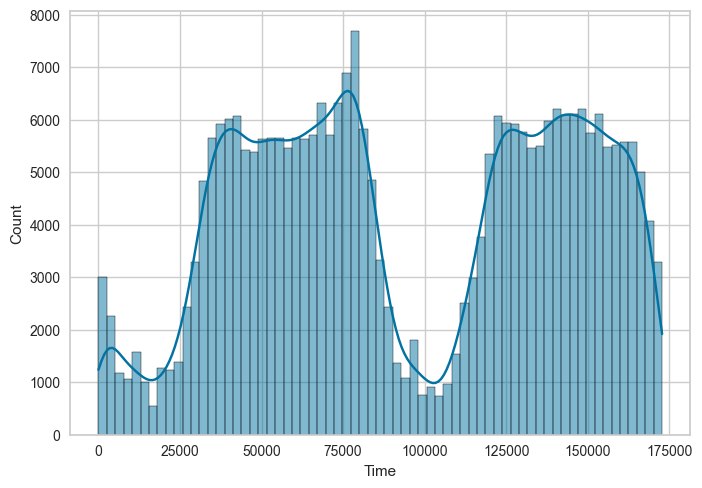

In [8]:
sns.histplot(df['Time'], kde=True)

count    283726.000000
mean         88.472687
std         250.399437
min           0.000000
25%           5.600000
50%          22.000000
75%          77.510000
max       25691.160000
Name: Amount, dtype: float64

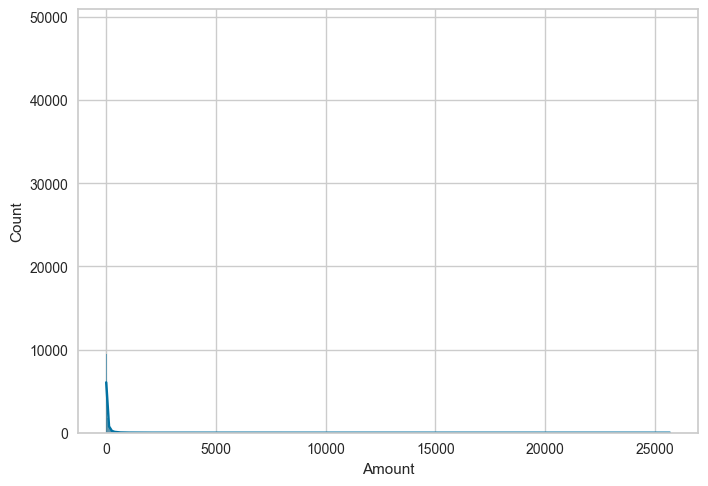

In [ ]:
sns.histplot(df['Amount'], kde=True)
df['Amount'].describe()

The amount data's mean is at 88 and there are values that spread all the way to over 25000. But we cannot actually quantify them as outliers since there are always people who spend much more than the average people. These are extreme customers that give us a right skewed distribution

yet, the mean is influenced by these heavy spenders and makes it not representative of the full data sample variations. 

In [22]:
# working with outliers
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 3 * IQR # using an 3 times the IQR cuz i still want to  preserve the original distribution
upper_bound = Q3 + 3 * IQR

outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]
print("Number of outliers identified:", len(outliers))

Number of outliers identified: 18802


In [23]:
#removing the outliers
filtered_df = df[(df['Amount'] >= lower_bound) & (df['Amount'] <= upper_bound)]

print(f"Original Data Shape: {df.shape}")
print(f"Filtered Data Shape: {filtered_df.shape}")

Original Data Shape: (283726, 31)
Filtered Data Shape: (264924, 31)


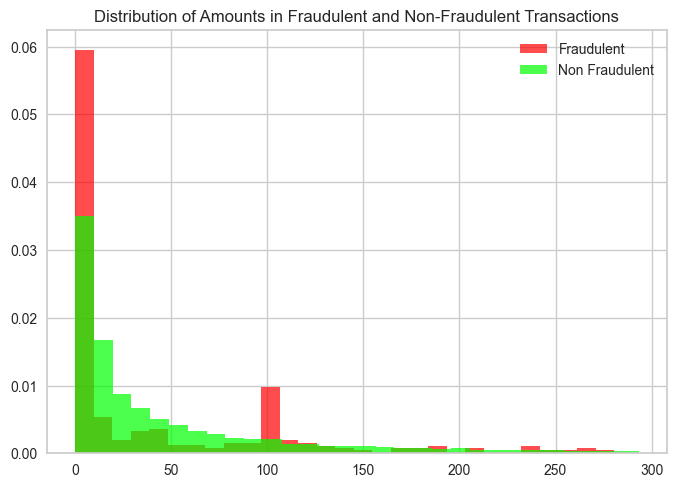

In [25]:
plt.hist(filtered_df[filtered_df["Class"]==1]["Amount"],color='red',density=True, bins=30,alpha=0.7,label="Fraudulent")
plt.hist(filtered_df[filtered_df["Class"] ==0]["Amount"],color='lime', density=True,bins=30,alpha=0.7,label="Non Fraudulent")
plt.title("Distribution of Amounts in Fraudulent and Non-Fraudulent Transactions")
plt.legend()

In [31]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


## Model development

In [32]:
# Initialize PyCaret
exp = setup(
    data=df,            # Dataset
    target='Class',     # Target column (fraud: 1, no fraud: 0)
    normalize=True,     # Auto-scale features
    fix_imbalance=True, # Handle class imbalance automatically
    session_id=123,     # Reproducibility
    remove_multicollinearity=True,  # Remove highly correlated features
    feature_selection=True,  # Automatically select important features
)

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Binary
3,Original data shape,"(283726, 31)"
4,Transformed data shape,"(481672, 7)"
5,Transformed train set shape,"(396554, 7)"
6,Transformed test set shape,"(85118, 7)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


In [33]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9992,0.9547,0.8311,0.7288,0.7717,0.7713,0.7754,7.5530
rf,Random Forest Classifier,0.9987,0.9521,0.8282,0.5846,0.6816,0.6810,0.6932,35.0100
dummy,Dummy Classifier,0.9983,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,2.5790
dt,Decision Tree Classifier,0.9970,0.9021,0.8070,0.3370,0.4741,0.4729,0.5195,7.9310
lightgbm,Light Gradient Boosting Machine,0.9959,0.9541,0.8461,0.2689,0.4069,0.4054,0.4748,3.3330
knn,K Neighbors Classifier,0.9957,0.9234,0.8492,0.2618,0.3991,0.3975,0.4692,4.7020
ridge,Ridge Classifier,0.9936,0.9677,0.7948,0.1813,0.2945,0.2926,0.3770,3.9810
lda,Linear Discriminant Analysis,0.9936,0.9677,0.7948,0.1813,0.2945,0.2926,0.3770,2.3540
gbc,Gradient Boosting Classifier,0.9897,0.9652,0.8701,0.1279,0.2225,0.2202,0.3305,37.6960
svm,SVM - Linear Kernel,0.9855,0.9740,0.8883,0.0996,0.1781,0.1756,0.2925,5.0140


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

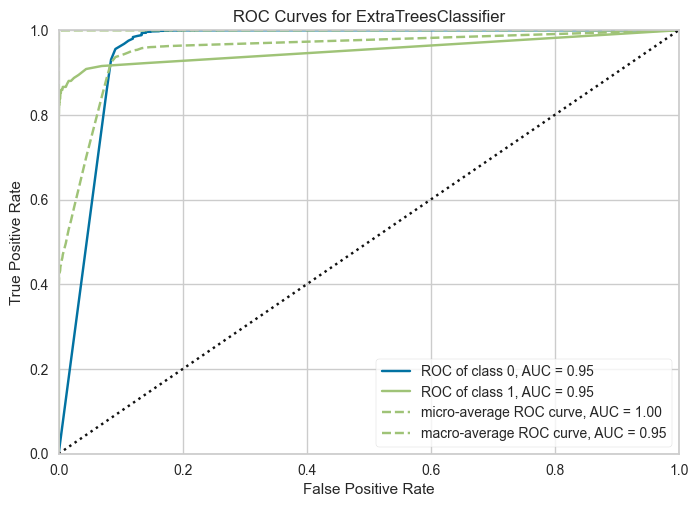

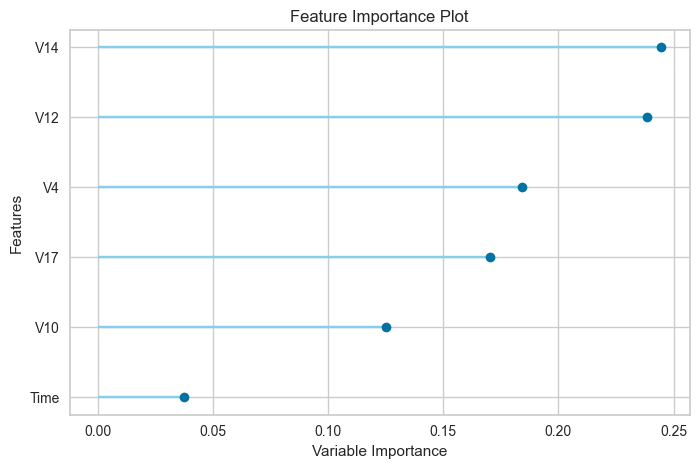

In [34]:
#additional insights into the model performances.
evaluate_model(best_model)

plot_model(best_model, plot='auc')
plot_model(best_model, plot='feature')

In [35]:
print(best_model)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)


In [36]:
# Finalize the best model
final_model = finalize_model(best_model)

In [37]:
new_data = {
    'Time': 10000,          # Time in seconds since the first transaction (randomized value)
    'V1': -0.095459,       # Example of a transformed feature (V1, V2, ..., V28 are PCA components)
    'V2': -0.237526,
    'V3': 0.106145,
    'V4': -0.278178,
    'V5': 0.437071,
    'V6': 0.060357,
    'V7': 0.133052,
    'V8': 0.029633,
    'V9': -0.157134,
    'V10': -0.054302,
    'V11': 0.124157,
    'V12': -0.038907,
    'V13': -0.282089,
    'V14': 0.091447,
    'V15': -0.165314,
    'V16': 0.058350,
    'V17': 0.073775,
    'V18': 0.029840,
    'V19': -0.087655,
    'V20': -0.169512,
    'V21': -0.020706,
    'V22': 0.007763,
    'V23': -0.098381,
    'V24': -0.078027,
    'V25': 0.135968,
    'V26': 0.006929,
    'V27': -0.063157,
    'V28': 0.029586,
    'Amount': 55.75,        # Transaction amount
}

new_data_df = pd.DataFrame([new_data])

predictions = predict_model(final_model, data=new_data_df)

In [38]:
print("Available columns:", predictions.columns.tolist())

Available columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'prediction_label', 'prediction_score']


In [39]:
print(predictions[['prediction_label', 'prediction_score']]) 

   prediction_label  prediction_score
0                 0               1.0


In [40]:
save_model(final_model, 'saved_model_1')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Time', 'V1', 'V2', 'V3', 'V4',
                                              'V5', 'V6', 'V7', 'V8', 'V9',
                                              'V10', 'V11', 'V12', 'V13', 'V14',
                                              'V15', 'V16', 'V17', 'V18', 'V19',
                                              'V20', 'V21', 'V22', 'V23', 'V24',
                                              'V25', 'V26', 'V27', 'V28',
                                              'Amount'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                   